In [1]:
#Necessary librarys
import os
import random

import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import json
from pandas.io.json import json_normalize # 이것의 사용법은 더 자세히 봐야겠음

plt.style.use('fivethirtyeight')

## Transformation Json format

In [2]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
dir_path  ="../../Kaggle_data/Google_Analytics/"

In [3]:
p = 0.1 #random seaprater in train data

# Json to table code
def json_read(df):
    data_frame = dir_path + df
    
    df = pd.read_csv(data_frame, 
                     converters={column : json.loads for column in columns}, 
                     dtype={'fullVisitorId' : 'str'}, 
                     skiprows= lambda i : i>0 and random.random()>p)
    
    for column in columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = ["{column}.{subcolumn}".format(column = column, subcolumn = subcolumn) for subcolumn in column_as_df.columns]
        df = df.drop(column, axis = 1).merge(column_as_df, right_index = True, left_index = True)
        
    print("Loaded {base_name}. Shape: {shape}".format(base_name = os.path.basename(data_frame), shape = df.shape))
    return df

In [4]:
%%time
df_train = json_read("train.csv.zip")

Loaded train.csv.zip. Shape: (90582, 54)
CPU times: user 13.3 s, sys: 353 ms, total: 13.6 s
Wall time: 13.6 s


In [5]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
2,Organic Search,20160902,2222266935962032743,2222266935962032743_1472826820,Not Socially Engaged,1472826820,1,1472826820,Internet Explorer,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,6035953832076917545,6035953832076917545_1472811667,Not Socially Engaged,1472811667,1,1472811667,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20160902,542217492398994444,542217492398994444_1472822034,Not Socially Engaged,1472822034,1,1472822034,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


## missing vlaues

In [6]:
def missin_values(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/ data.isnull().count() * 100).sort_values(ascending = False)
    df = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
    
    return df[~(df['Total'] == 0 )]

In [7]:
missin_values(df_train)

,Total,Percent
trafficSource.adContent,89451,98.751408
totals.transactionRevenue,89415,98.711665
trafficSource.adwordsClickInfo.adNetworkType,88386,97.575677
trafficSource.adwordsClickInfo.slot,88386,97.575677
trafficSource.adwordsClickInfo.page,88386,97.575677
trafficSource.adwordsClickInfo.isVideoAd,88386,97.575677
trafficSource.adwordsClickInfo.gclId,88373,97.561326
trafficSource.isTrueDirect,63181,69.750061
trafficSource.referralPath,57370,63.334879
trafficSource.keyword,50290,55.518756


In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90582 entries, 0 to 90581
Data columns (total 54 columns):
channelGrouping                                      90582 non-null object
date                                                 90582 non-null int64
fullVisitorId                                        90582 non-null object
sessionId                                            90582 non-null object
socialEngagementType                                 90582 non-null object
visitId                                              90582 non-null int64
visitNumber                                          90582 non-null int64
visitStartTime                                       90582 non-null int64
device.browser                                       90582 non-null object
device.browserSize                                   90582 non-null object
device.browserVersion                                90582 non-null object
device.deviceCategory                                90582 non-null ob

In [9]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
2,Organic Search,20160902,2222266935962032743,2222266935962032743_1472826820,Not Socially Engaged,1472826820,1,1472826820,Internet Explorer,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,6035953832076917545,6035953832076917545_1472811667,Not Socially Engaged,1472811667,1,1472811667,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20160902,542217492398994444,542217492398994444_1472822034,Not Socially Engaged,1472822034,1,1472822034,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [10]:
from datetime import datetime

In [11]:
def date_process(df):
    df['date'] = df['date'].astype(str)
    df['date'] = df['date'].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    
    
    
    df['date'] = pd.to_datetime(df['date'])
    df['_weekday'] = df['date'].dt.weekday
    df['_day'] = df['date'].dt.day
    df['_month'] = df['date'].dt.month
    df['_year'] = df['date'].dt.year
    df['_visitHour'] = df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))


    
    return df

In [12]:
df_train = date_process(df_train)
df_train.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,(not provided),organic,NaN,google,4,2,9,2016,10
1,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,True,(not provided),organic,NaN,google,4,2,9,2016,22


## Numeric value attention

In [13]:
from sklearn import preprocessing

In [14]:
# trafficSource.adContent	89455	98.750373
# totals.transactionRevenue	89402	98.691865
# trafficSource.adwordsClickInfo.adNetworkType	88401	97.586850
# trafficSource.adwordsClickInfo.slot	88401	97.586850
# trafficSource.adwordsClickInfo.page	88401	97.586850
# trafficSource.adwordsClickInfo.isVideoAd	88401	97.586850
# trafficSource.adwordsClickInfo.gclId	88395	97.580227
# trafficSource.isTrueDirect	63296	69.873161
# trafficSource.referralPath	57550	63.530087
# trafficSource.keyword	50260	55.482575
# totals.bounces	45692	50.439909
# totals.newVisits	19896	21.963416
# totals.pageviews	12	0.013247

In [15]:
def num_treat(df):
    df['totals.pageviews'] .fillna(1, inplace = True)
    df['totals.newVisits'] .fillna(0, inplace = True)
    df['totals.bounces'] .fillna(0, inplace = True)
    df['totals.pageviews']  = df['totals.pageviews'].astype(int)
    df['totals.newVisits']  = df['totals.newVisits'].astype(int)
    df['totals.bounces']  = df['totals.bounces'].astype(int)
    
    df['trafficSource.isTrueDirect'].fillna(False, inplace =True)
    return df

In [16]:
df_train = num_treat(df_train)

In [17]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,False,(not provided),organic,NaN,google,4,2,9,2016,10
1,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,True,(not provided),organic,NaN,google,4,2,9,2016,22
2,Organic Search,2016-09-02,2222266935962032743,2222266935962032743_1472826820,Not Socially Engaged,1472826820,1,1472826820,Internet Explorer,not available in demo dataset,...,False,(not provided),organic,NaN,google,4,2,9,2016,23
3,Organic Search,2016-09-02,6035953832076917545,6035953832076917545_1472811667,Not Socially Engaged,1472811667,1,1472811667,Chrome,not available in demo dataset,...,False,(not provided),organic,NaN,google,4,2,9,2016,19
4,Organic Search,2016-09-02,542217492398994444,542217492398994444_1472822034,Not Socially Engaged,1472822034,1,1472822034,Chrome,not available in demo dataset,...,False,(not provided),organic,NaN,google,4,2,9,2016,22


### take off unique value (Just one value)

In [18]:
df_train['channelGrouping'].nunique()

8

In [19]:
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]

df_train.drop(clean_consts, axis=1, inplace=True)

print("This will drop : ", len(clean_consts), "columns")
print("Dropped columns : \n", clean_consts)

This will drop :  21 columns
Dropped columns : 
 ['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.isVideoAd']


In [20]:
df_train.nunique()

channelGrouping                             8
date                                      366
fullVisitorId                           85970
sessionId                               90573
visitId                                 90393
visitNumber                               216
visitStartTime                          90402
device.browser                             31
device.deviceCategory                       3
device.isMobile                             2
device.operatingSystem                     15
geoNetwork.city                           541
geoNetwork.continent                        6
geoNetwork.country                        189
geoNetwork.metro                           82
geoNetwork.networkDomain                 7139
geoNetwork.region                         330
geoNetwork.subContinent                    23
totals.bounces                              2
totals.hits                               164
totals.newVisits                            2
totals.pageviews                  

In [21]:
df_train['totals.hits'].dtype

dtype('O')

## Searching all categories

In [22]:
columns_categorical = [
    'channelGrouping','device.browser', 'device.deviceCategory',
    'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
    'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
    'geoNetwork.networkDomain', 'geoNetwork.region', 'geoNetwork.subContinent',
    'trafficSource.adContent', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
    'trafficSource.medium', 'trafficSource.source'
]

for column in columns_categorical:
    print(column, ':  ', df_train[column].unique())
    print("")

channelGrouping :   ['Organic Search' 'Referral' 'Affiliates' 'Direct' 'Display' 'Paid Search'
 'Social' '(Other)']

device.browser :   ['Chrome' 'Internet Explorer' 'Safari' 'Firefox' 'Edge' 'Safari (in-app)'
 'Opera' 'Opera Mini' 'Nokia Browser' 'Android Webview' 'YaBrowser'
 'UC Browser' 'Amazon Silk' 'Android Browser' 'Coc Coc' 'ThumbSniper'
 'Mozilla Compatible Agent' 'Maxthon' 'Nintendo Browser' 'LYF_LS_4002_12'
 'osee2unifiedRelease' 'MRCHROME' 'Iron' 'BlackBerry' 'Lunascape' 'Puffin'
 '0' 'Apple-iPhone7C2' 'NokiaE52-1' 'Seznam' 'Mozilla']

device.deviceCategory :   ['desktop' 'mobile' 'tablet']

device.isMobile :   [False  True]

device.operatingSystem :   ['Windows' 'Android' 'Macintosh' 'iOS' 'Linux' 'Chrome OS' '(not set)'
 'Windows Phone' 'Firefox OS' 'Samsung' 'Nintendo Wii' 'BlackBerry' 'Xbox'
 'Nintendo WiiU' 'Nokia']

geoNetwork.city :   ['Madrid' 'not available in demo dataset' 'Paris' 'Amsterdam' 'Singapore'
 'Mountain View' 'Buenos Aires' 'Barcelona' 'Rome' 'Sydney' 

In [23]:
def Normalize(df) : 
    df['totals.hits'] = df['totals.hits'].astype(float)
    df['totals.hits'] = preprocessing.MinMaxScaler(df['totals.hits'])
    
    df['totals.pageviews'] = preprocessing.MinMaxScaler(df['totals.pageviews'])
    
    df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)
    df['totals.transactionRevenue'] = df['totals.transactionRevenue'].fillna(0.0)
    df['totals.transactionRevenue_log'] = np.log(df[
                df['totals.transactionRevenue'] > 0]['totals.transactionRevenue'] + 0.01)
    
    return df

In [24]:
df_train = Normalize(df_train)

In [25]:
print("Transaction Revenue Min Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].min())
print("Transaction Revenue Mean Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].mean())
print("Transaction Revenue Median Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].median())
print("Transaction Revenue Max Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].max())

Transaction Revenue Min Value :  990000.0
Transaction Revenue Mean Value :  114941593.83033419
Transaction Revenue Median Value :  45280000.0
Transaction Revenue Max Value :  3388800000.0


In [26]:
df_train['totals.transactionRevenue'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
df_train['totals.transactionRevenue_log'].isnull().sum()

89415

In [28]:
df_train.shape

(90582, 39)

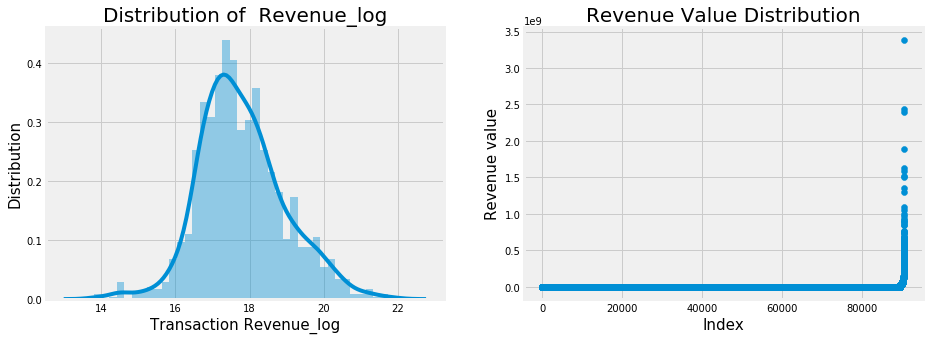

In [29]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01)
                  , bins = 40, kde= True)
ax.set_xlabel('Transaction Revenue_log', fontsize = 15)
ax.set_ylabel('Distribution', fontsize = 15)
ax.set_title('Distribution of  Revenue_log', fontsize = 20)

plt.subplot(1,2,2)
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize =15)
plt.ylabel('Revenue value', fontsize=15)
plt.title("Revenue Value Distribution", fontsize =20)

plt.show()

### 첨도(Kurtosis), 왜도(Skewness) 측정
* 첨도는 0에 근사할 수록 정규분포에 근사한다.
<br>분포값이 0초과일 경우 점차 뾰족해진다.
![첨도(Kurtosis)](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Standard_symmetric_pdfs.png/300px-Standard_symmetric_pdfs.png)
* 왜도는 0에 근사할 수록 정규분포에 근사한다.(-0.5 ~ 0.5를 이상적인 값으로 여김)
<br>분포값이 음수일 경우 오른쪽에 많은 값이 있음, 왼쪽으로 긴꼬리. 
<br>분포값이 양수일 경우 왼쪽에 많은 값이 있음, 오른쪽으로 긴꼬리.
![왜도(Skewness)](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/350px-Negative_and_positive_skew_diagrams_%28English%29.svg.png)

In [30]:
print('Excess Kurtosis of normal distribution : {}'.format(
    kurtosis(df_train[df_train['totals.transactionRevenue_log']>0]['totals.transactionRevenue_log'])))
print('Skewness of normal distribution : {}'.format(
    skew(df_train[df_train['totals.transactionRevenue_log']>0]['totals.transactionRevenue_log'])))

Excess Kurtosis of normal distribution : 0.5939192047352995
Skewness of normal distribution : 0.3436196508894047


## Device Browsers


Percntual of browser usage : 
Chrome               61949
Safari               18493
Firefox               3717
Internet Explorer     1993
Edge                  1020
Android Webview        777
Safari (in-app)        710
Opera Mini             609
Opera                  522
UC Browser             233
Name: device.browser, dtype: int64


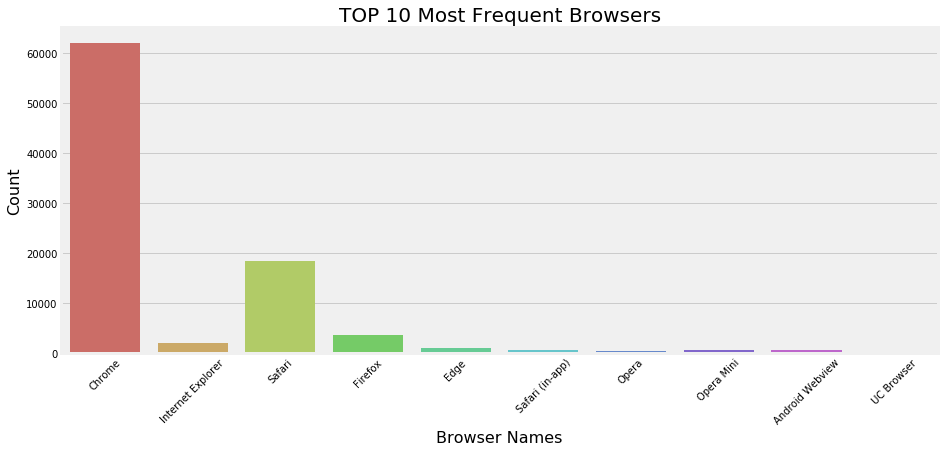

In [31]:
# top 10 of browser percent
print("Percntual of browser usage : ")
print(df_train['device.browser'].value_counts().sort_values(ascending = False)[:10])

plt.figure(figsize=(14,6))

sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette = 'hls')

plt.title("TOP 10 Most Frequent Browsers", fontsize = 20)
plt.xlabel("Browser Names", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.xticks(rotation =45)#x축 라벨 회전
plt.show()

In [32]:
df_train['device.browser'].value_counts()[:10].index.values

array(['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge',
       'Android Webview', 'Safari (in-app)', 'Opera Mini', 'Opera',
       'UC Browser'], dtype=object)

In [33]:
df_train[df_train['device.browser'].isin(df_train['device.browser'].value_counts()[:10].index.values)]['device.browser']

0                   Chrome
1                   Chrome
2        Internet Explorer
3                   Chrome
4                   Chrome
5                   Chrome
6                   Chrome
7                   Chrome
8                   Safari
9                   Chrome
10                  Chrome
11                  Chrome
12                  Safari
13                  Chrome
14                 Firefox
15                  Chrome
16                  Chrome
17                  Chrome
18                  Chrome
19                  Chrome
20                  Chrome
21                  Chrome
22                  Chrome
23                  Chrome
24                    Edge
25                  Chrome
26                  Chrome
27                  Safari
28                  Safari
29                  Safari
               ...        
90552               Chrome
90553               Chrome
90554               Chrome
90555               Chrome
90556              Firefox
90557               Chrome
9

### Revenue and Browser

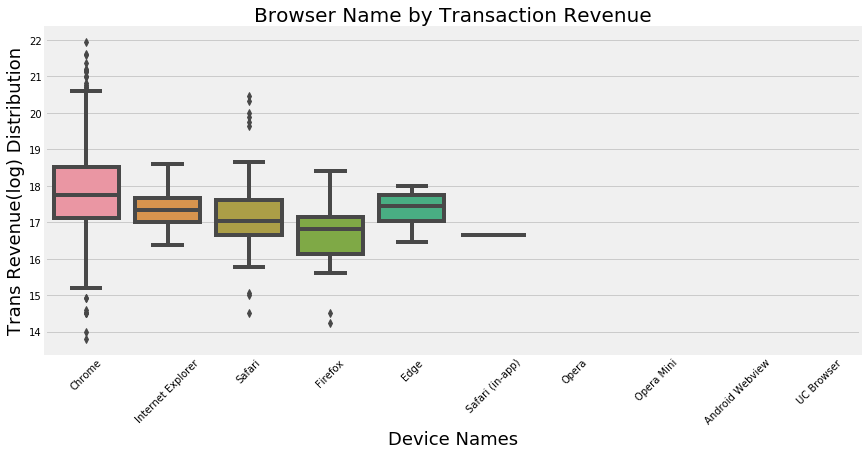

In [34]:
plt.figure(figsize=(13,6))

g1 = sns.boxplot(x = 'device.browser', y= 'totals.transactionRevenue_log',
                data = df_train[df_train['device.browser']\
                                .isin(df_train['device.browser']\
                                      .value_counts()[:10].index.values)])


g1.set_title('Browser Name by Transaction Revenue', fontsize =20)
g1.set_xticklabels(g1. get_xticklabels(), rotation = 45)
g1.set_xlabel('Device Names', fontsize=18)
g1.set_ylabel('Trans Revenue(log) Distribution', fontsize = 18)

plt.show()

### Channel Grouping

In [35]:
df_train['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Affiliates', 'Direct', 'Display',
       'Paid Search', 'Social', '(Other)'], dtype=object)

In [36]:
print("Percentual of Channel Grouping used : ")
print((df_train['channelGrouping'].value_counts()[:7]))

Percentual of Channel Grouping used : 
Organic Search    38302
Social            22676
Direct            14284
Referral          10536
Paid Search        2566
Affiliates         1589
Display             620
Name: channelGrouping, dtype: int64


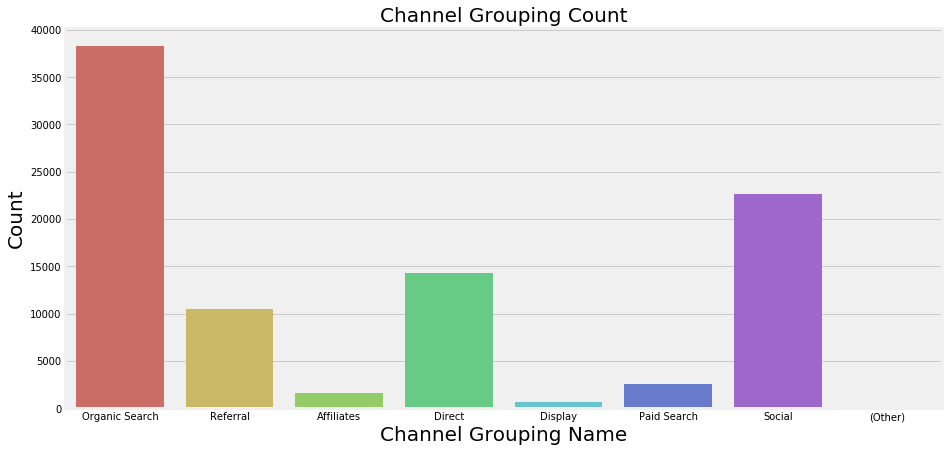

In [37]:
plt.figure(figsize=(14,7))
sns.countplot(df_train['channelGrouping'], palette='hls')
plt.title("Channel Grouping Count", fontsize =20)
plt.xlabel("Channel Grouping Name", fontsize =20)
plt.ylabel("Count", fontsize =20)
plt.show()

### Crossing Channel Grouping and Browsers
* 참신한 방법인듯

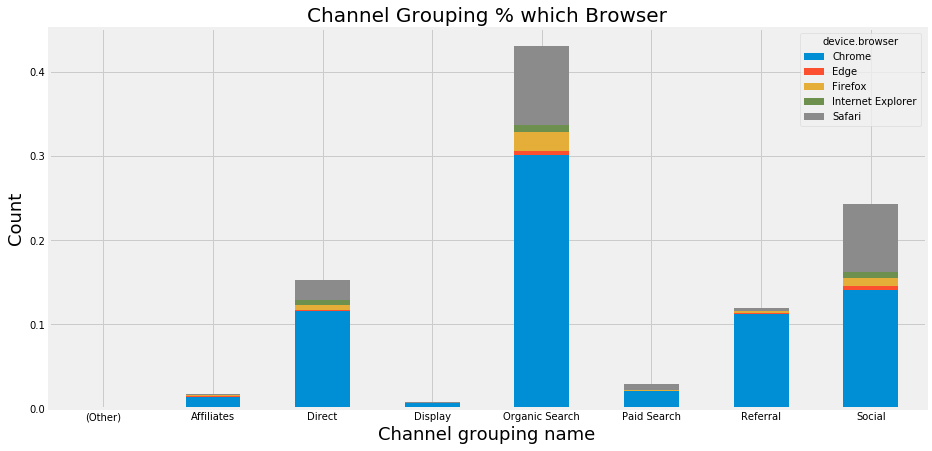

In [38]:
crosstab_eda = pd.crosstab(index = df_train['channelGrouping'], normalize=True, columns=df_train[df_train['device.browser']\
                                                                                                 .isin(df_train['device.browser'].value_counts()[:5]\
                                                                                                       .index.values)]['device.browser'])


crosstab_eda.plot(kind=  'bar', figsize = (14,7), stacked = True)
plt.title("Channel Grouping % which Browser", fontsize = 20)
plt.xlabel("Channel grouping name", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.xticks(rotation = 0)
plt.show()

### Operational System

In [39]:
print("Percentual of Operational System : ")
print(df_train['device.operatingSystem'].value_counts()[:5])

Percentual of Operational System : 
Windows      35149
Macintosh    25513
Android      12198
iOS          10993
Linux         3490
Name: device.operatingSystem, dtype: int64


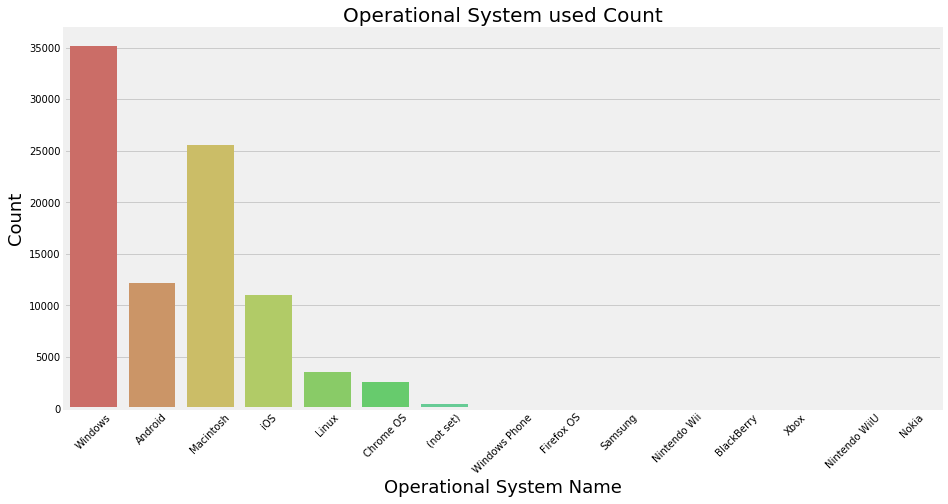

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(df_train['device.operatingSystem'],palette = 'hls')
plt.title("Operational System used Count", fontsize=20)
plt.xlabel("Operational System Name", fontsize=18)
plt.ylabel("Count", fontsize= 18)
plt.xticks(rotation = 45)
plt.show()

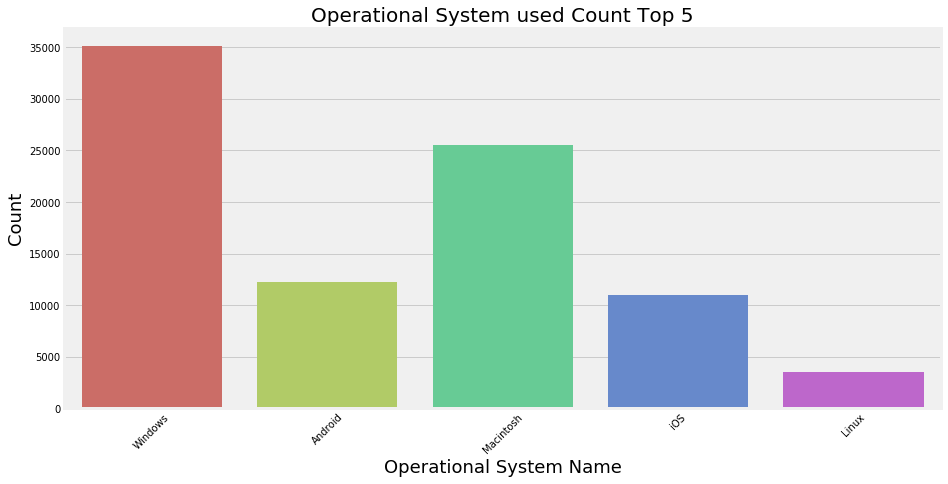

In [41]:
plt.figure(figsize=(14,7))
sns.countplot(df_train[df_train['device.operatingSystem']\
                       .isin(df_train['device.operatingSystem']\
                             .value_counts()[:5].index.values)]['device.operatingSystem'],palette = 'hls')
plt.title("Operational System used Count Top 5", fontsize=20)
plt.xlabel("Operational System Name", fontsize=18)
plt.ylabel("Count", fontsize= 18)
plt.xticks(rotation = 45)
plt.show()

## Used browser by Operational system

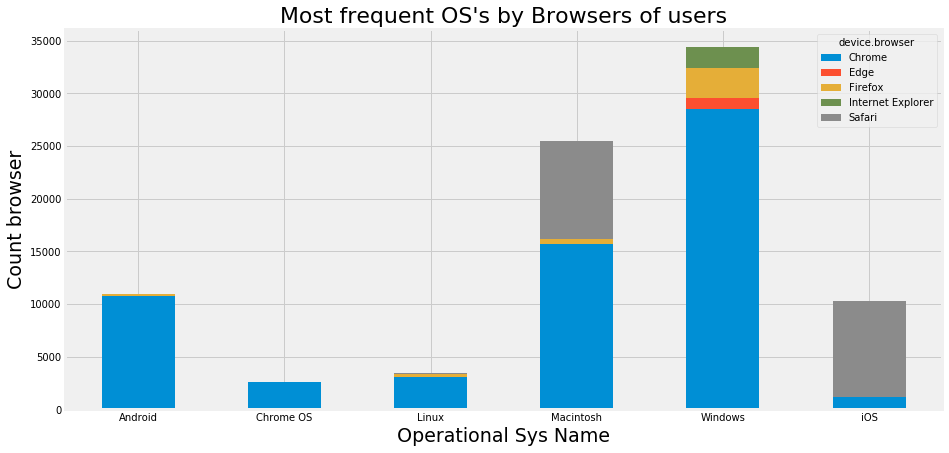

In [42]:
crosstab_eda = pd.crosstab(index = df_train[df_train['device.operatingSystem'].isin(df_train['device.operatingSystem'].value_counts()[:6].index.values)]['device.operatingSystem'],
                                            columns = df_train[df_train['device.browser'].isin(df_train['device.browser'].value_counts()[:5].index.values)]['device.browser'])


crosstab_eda.plot(kind = 'bar',
                             figsize = (14,7),
                             stacked=True)

plt.title("Most frequent OS's by Browsers of users", fontsize = 22)
plt.xlabel("Operational Sys Name", fontsize=19)
plt.ylabel("Count browser", fontsize=19)
plt.xticks(rotation = 0)
plt.show()


## Distribution revenue by OS????

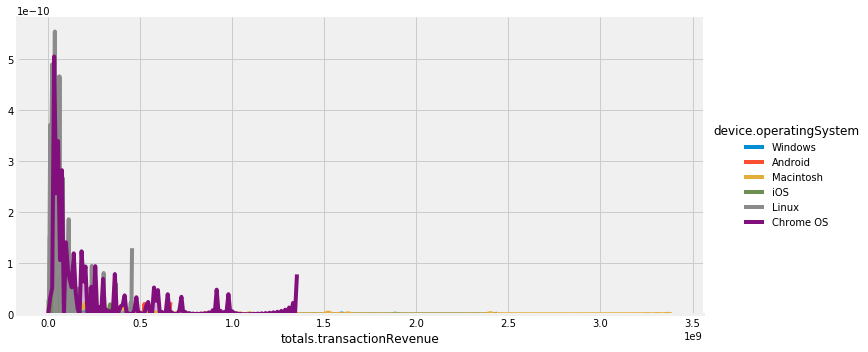

In [43]:
(sns.FacetGrid(df_train[(df_train['device.operatingSystem']\
                         .isin(df_train['device.operatingSystem']\
                               .value_counts()[:6].index.values)) ], 
               hue='device.operatingSystem',height = 5, aspect = 2)
 .map(sns.kdeplot, 'totals.transactionRevenue', shade = True)
 .add_legend())

plt.show()

## Device Category

In [44]:
print("Percentural of Operational System: ")
print(round(df_train['device.deviceCategory'].value_counts() / len(df_train['device.deviceCategory']) * 100 ,2))

Percentural of Operational System: 
desktop    73.55
mobile     23.02
tablet      3.43
Name: device.deviceCategory, dtype: float64


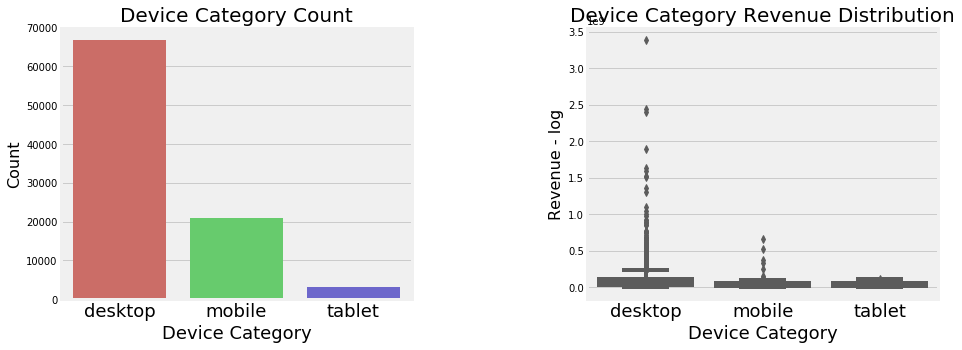

In [45]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(df_train['device.deviceCategory'], palette = 'hls')
plt.title("Device Category Count", fontsize = 20)
plt.xlabel("Device Category", fontsize = 18)
plt.ylabel("Count", fontsize= 16)
plt.xticks(fontsize = 18)

plt.subplot(1,2,2)
sns.boxplot(x = "device.deviceCategory",  y = 'totals.transactionRevenue',
           data = df_train[df_train['totals.transactionRevenue'] > 0 ], palette = "hls")

plt.title("Device Category Revenue Distribution", fontsize = 20)
plt.xlabel("Device Category", fontsize = 18)
plt.ylabel("Revenue - log",fontsize=16)
plt.xticks(fontsize = 18)

plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()


## Defference distribution between Devices

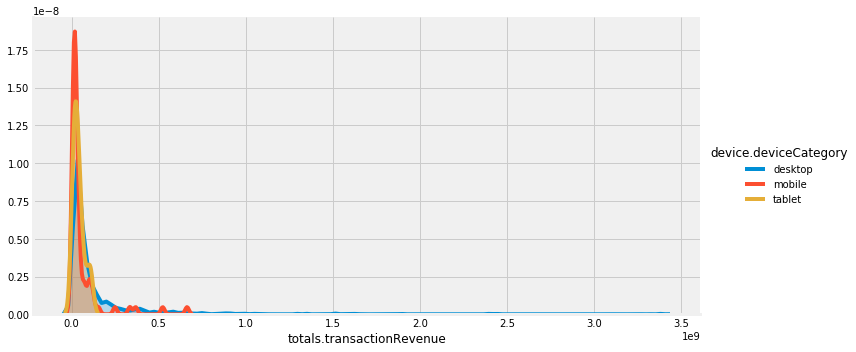

In [46]:
(sns.FacetGrid(df_train[df_train['totals.transactionRevenue'] >0] ,
              hue = 'device.deviceCategory', height =5, aspect =2)
 .map(sns.kdeplot, 'totals.transactionRevenue', shade = True)
 .add_legend()
)
plt.show()

##  OS by Device category 

In [47]:
crosstab_eda = pd.crosstab(index = df_train['device.deviceCategory'],
                          columns = df_train[df_train['device.operatingSystem']\
                                             .isin(df_train['device.operatingSystem']\
                                                   .value_counts()[:6].index.values)]['device.operatingSystem'])

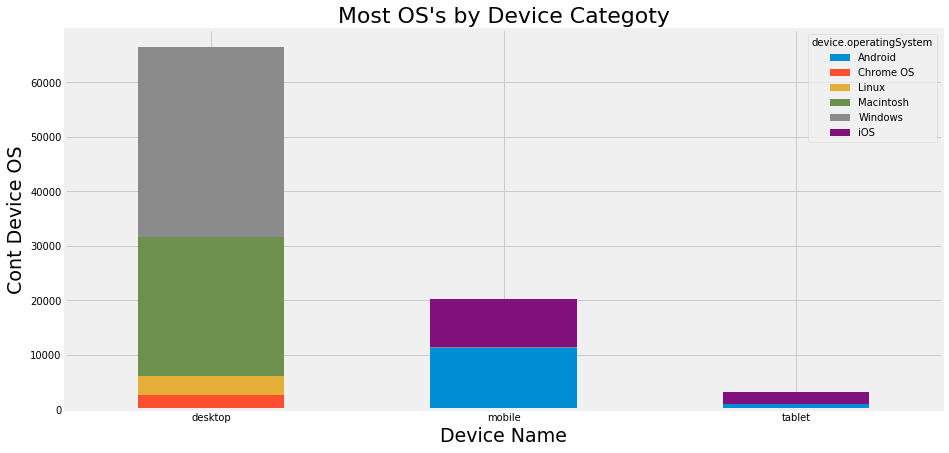

In [48]:
crosstab_eda.plot(kind = 'bar',
                 figsize = (14,7),
                 stacked= True)
plt.title("Most OS's by Device Categoty", fontsize = 22)
plt.xlabel("Device Name", fontsize = 19)
plt.ylabel("Cont Device OS", fontsize = 19)
plt.xticks(rotation = 0)
plt.show()


## Interactive date features

In [49]:
df_train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent', 'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', '_weekday', '_day', '_month', '_year',
       '_visitHour', 'totals.transactionRevenue_log'],
      dtype='object')

In [50]:
year = df_train['_year'].value_counts()         # counting the Year with value counts
month = df_train['_month'].value_counts()      # coutning months
weeday = df_train['_weekday'].value_counts()    # Couting weekday
day = df_train['_day'].value_counts()              # counting Day
date = df_train['date'].value_counts()           # Counting date